In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from extra_packages.OutputInterface import OutputInterface
import extra_packages.sperhical_expansion as se
import SFALinearPulse as SFA_Lin
from matplotlib.colors import LogNorm
from scipy.special import sph_harm

In [2]:
import multiprocessing
#import ipyparallel as ipp
try:
    cpus = multiprocessing.cpu_count()
except NotImplementedError:
    cpus = 8   # arbitrary default
pool = multiprocessing.Pool(processes=cpus)

In [3]:
omega = 0.057     # Frequency of light
Up = 0.22         # Ponderomotive potential
CEP = np.pi/2     # This choice should make things symmetric

In [4]:
def plot_M_grid(M_grid, px_list, pz_list, log=False, log_scale = 1e-4):
    """
    Function to plot the calculated grids
    """
    plt.figure(facecolor='white', figsize=(12,6))

    M2_grid = np.abs(M_grid)**2
    MMax = np.max(M2_grid)

    if log:
        plt.imshow(np.flip(M2_grid,0), extent = (np.amin(pz_list), np.amax(pz_list), np.amin(px_list), np.amax(px_list)),
                   cmap='inferno', norm=LogNorm(vmin=MMax*log_scale, vmax=MMax),
                   interpolation = 'bicubic', aspect = 1.)
    else:
        plt.imshow(np.flip(M2_grid,0), extent = (np.amin(pz_list), np.amax(pz_list), np.amin(px_list), np.amax(px_list)),
                   cmap='inferno', interpolation = 'bicubic', aspect = 1.)

    plt.ylabel("$p_x$")
    plt.xlabel("$p_z$")
    plt.colorbar()
    plt.show()

In [5]:
file_name = 'output_files/CHBrClF1.out'
output = OutputInterface(file_name)
Ip = -output.saved_orbitals[output.HOMO][0]  # Should we put this to 1/2?
kappa = np.sqrt(2*Ip)
GTO_coeffs = np.array(output.output_GTOs())

In [137]:
n_r = 50
n_l = 30
r_lst = np.linspace(1, 15, n_r)
f_lms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    f_lms.append(se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(r, theta, phi), 50))
f_lms = np.array(f_lms)

Evaluating at r=1.0000 	 Nr. 1/50
Evaluating at r=1.2857 	 Nr. 2/50
Evaluating at r=1.5714 	 Nr. 3/50
Evaluating at r=1.8571 	 Nr. 4/50
Evaluating at r=2.1429 	 Nr. 5/50
Evaluating at r=2.4286 	 Nr. 6/50
Evaluating at r=2.7143 	 Nr. 7/50
Evaluating at r=3.0000 	 Nr. 8/50
Evaluating at r=3.2857 	 Nr. 9/50
Evaluating at r=3.5714 	 Nr. 10/50
Evaluating at r=3.8571 	 Nr. 11/50
Evaluating at r=4.1429 	 Nr. 12/50
Evaluating at r=4.4286 	 Nr. 13/50
Evaluating at r=4.7143 	 Nr. 14/50
Evaluating at r=5.0000 	 Nr. 15/50
Evaluating at r=5.2857 	 Nr. 16/50
Evaluating at r=5.5714 	 Nr. 17/50
Evaluating at r=5.8571 	 Nr. 18/50
Evaluating at r=6.1429 	 Nr. 19/50
Evaluating at r=6.4286 	 Nr. 20/50
Evaluating at r=6.7143 	 Nr. 21/50
Evaluating at r=7.0000 	 Nr. 22/50
Evaluating at r=7.2857 	 Nr. 23/50
Evaluating at r=7.5714 	 Nr. 24/50
Evaluating at r=7.8571 	 Nr. 25/50
Evaluating at r=8.1429 	 Nr. 26/50
Evaluating at r=8.4286 	 Nr. 27/50
Evaluating at r=8.7143 	 Nr. 28/50
Evaluating at r=9.0000 	 Nr. 

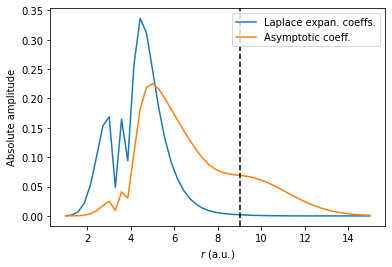

In [154]:
def radial(r):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

sgn, l, m = 1, 8, 1
v_line_val = 9
plt.figure(facecolor='white')
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, abs(m)])*100, label='Laplace expan. coeffs.')
plt.plot(r_lst, np.abs(f_lms[:, sgn, l, abs(m)]) / radial(r_lst), label='Asymptotic coeff.')
plt.axvline(v_line_val, ls='--', color='k')                              # r = 7 seems like a solid choice!
plt.xlabel('$r$ (a.u.)')
plt.ylabel('Absolute amplitude')
plt.legend()
plt.show()

In [6]:
# The below are the Clm's up to and including l=8.
matched_rs = np.loadtxt('CHBrClF_macthed_rs.txt')
r_array = se.convert_list_to_clm_array(matched_rs)
clm_array_matched = se.get_as_from_r_array(output.eval_orbital_spherical, r_array, 50, Ip)

Calculating for l = 0 and m = 0,

Calculating for l = 1 and m = -1, 0, 1,

Calculating for l = 2 and m = -2, -1, 0, 1, 2,

Calculating for l = 3 and m = -3, -2, -1, 0, 1, 2, 3,

Calculating for l = 4 and m = -4, -3, -2, -1, 0, 1, 2, 3, 4,

Calculating for l = 5 and m = -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5,

Calculating for l = 6 and m = -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,

Calculating for l = 7 and m = -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7,

Calculating for l = 8 and m = -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8,

Calculating for l = 9 and m = -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,

Calculating for l = 10 and m = -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

Calculating for l = 11 and m = -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,



In [7]:
clm_array_unmatched = se.get_as_coeffs(output.eval_orbital_spherical, 7., 50, Ip)

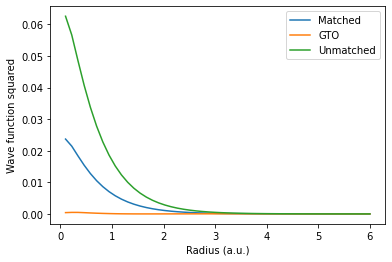

In [26]:
phi = np.pi/2
theta = np.pi

n_r = 50
r_lst = np.linspace(0.1, 6, n_r)

plt.figure(facecolor='white')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array_matched, Ip))**2, label='Matched')
plt.plot(r_lst, np.abs(output.eval_orbital_spherical(r_lst, theta, phi))**2, label='GTO')
plt.plot(r_lst, np.abs(se.eval_asymptotic(r_lst, theta, phi, clm_array_unmatched, Ip))**2, label='Unmatched')
plt.legend()
plt.xlabel('Radius (a.u.)')
plt.ylabel('Wave function squared')
plt.show()

### Let's see if there is any difference!

In [8]:
N = 50
pz_list = np.linspace(-1.5, 1.5, N)
px_list = np.linspace(-1, 1., N)
pzGrid, pxGrid = np.meshgrid(pz_list, px_list)
py = 0.

In [9]:
SP_asymp_martiny = SFA_Lin.SFALinearPulse(Ip, Up, omega, 2, CEP, target_="asymp_martiny")

In [10]:
M_matched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_matched))))

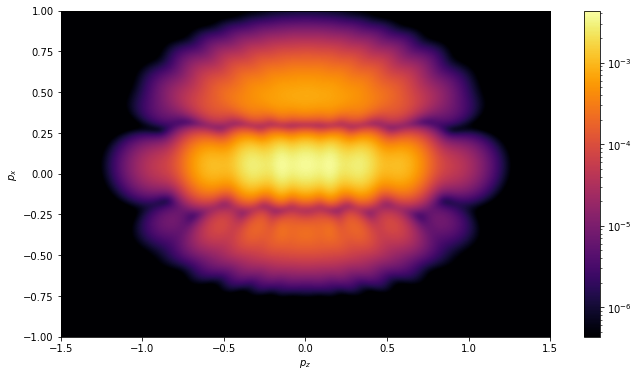

In [11]:
plot_M_grid(M_matched, px_list, pz_list, log=True)

### The one below is an old one, where there was only up to l=8 (including). These were matched also by hand, but in another 'run'.

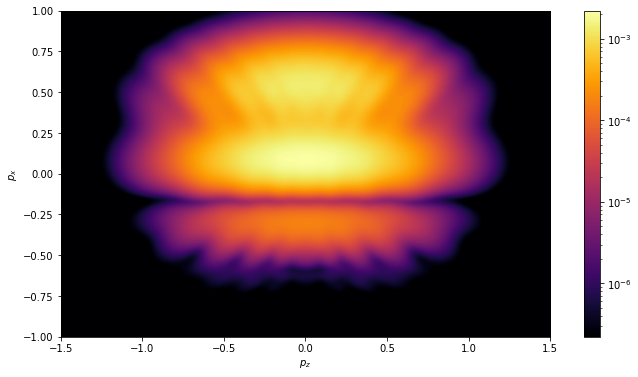

In [32]:
plot_M_grid(M_matched, px_list, pz_list, log=True)

### Just to make sure that the above improvement is actually from the extra coeffs, let's plot only up to the 8th l here:
The matching from the two runs are almost identical, but we can actually see a tiny difference! It matters quite a lot what r's we choose...

In [20]:
M_matched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_matched[:,:9,:9]))))

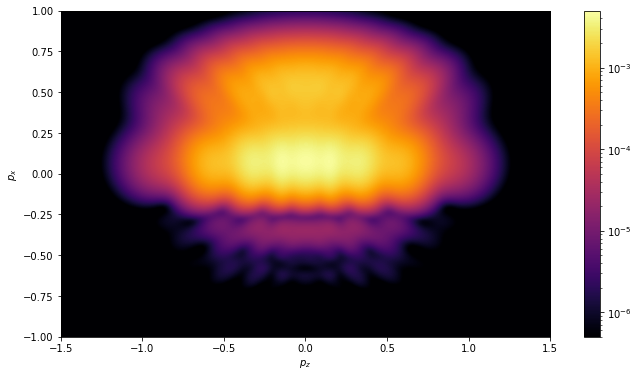

In [21]:
plot_M_grid(M_matched, px_list, pz_list, log=True)

### Plot the unmatched case 

In [12]:
M_unmatched = np.array(pool.starmap(SP_asymp_martiny.Mxz_List, zip(pxGrid, repeat(py), pzGrid, repeat(clm_array_unmatched))))

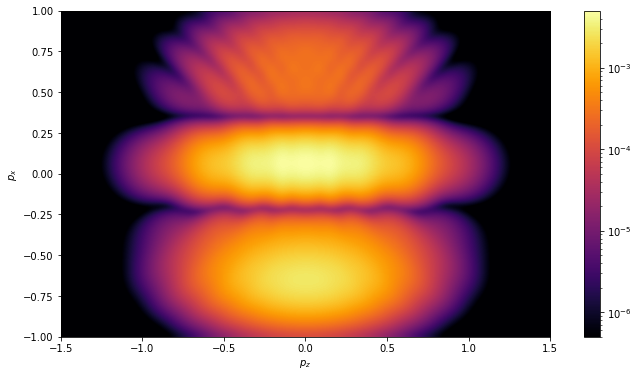

In [13]:
plot_M_grid(M_unmatched, px_list, pz_list, log=True)